In [7]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Set random seed. 
seed = 123
np.random.seed(seed) 

In [54]:
# Download the data.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip'
filename = 'dataset_diabetes.zip'
urllib.request.urlretrieve(url, filename)

# with zipfile.ZipFile(filename, 'r') as zip_ref:
    # zip_ref.extractall('data')

diabetic_data = pd.read_csv('data/dataset_diabetes/diabetic_data.csv', header=0, quotechar='"')

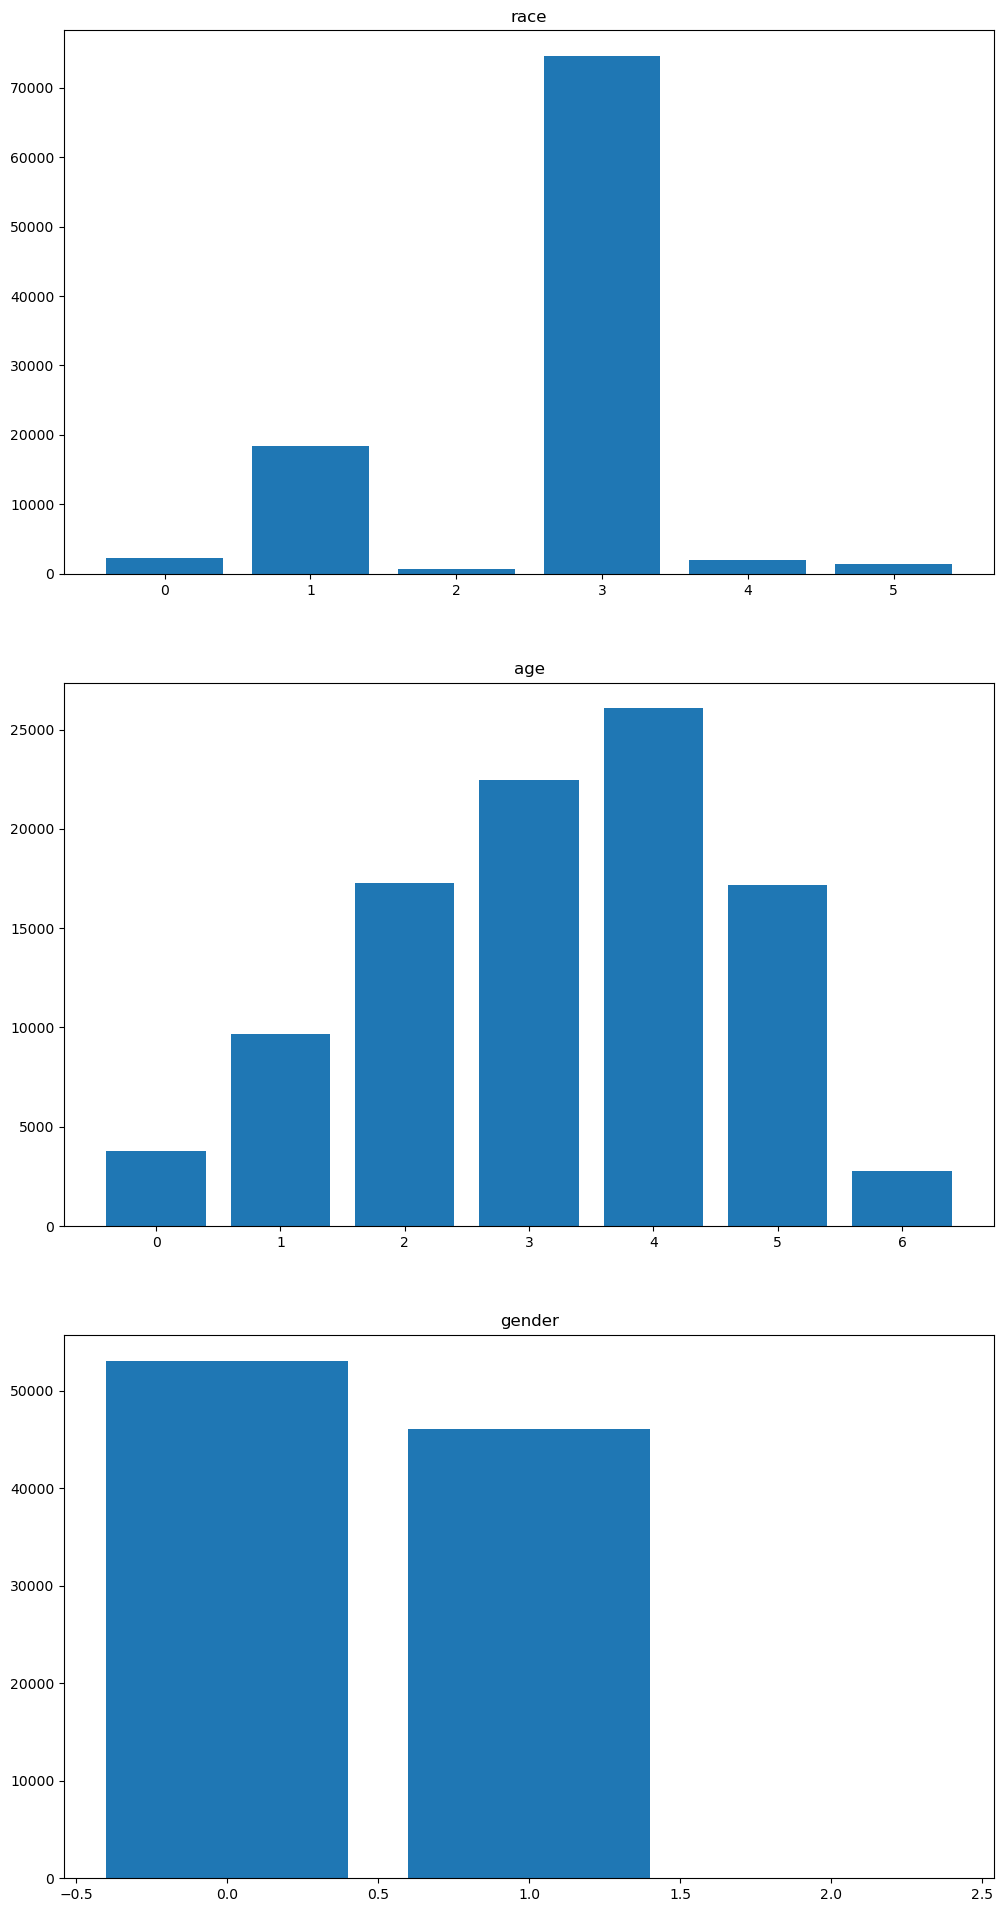

In [49]:
# Charts for Race, Age, and Gender
fig, ax = plt.subplots(3, 1, figsize=(12,24))
categories = ["race", "age", "gender"]
for i, j in enumerate (categories): 
    unique, counts = np.unique(diabetic_data[j], return_counts=True)
    ax[i].bar (unique, counts)
    ax[i].set_title (j)
    
    # Calculate the percentage for each subcategory: 
    #print (f"{j}")    
    #for i, element in enumerate (unique): 
    #    print (f"{100 * round (counts[i]/np.sum(counts), 2)}% {element}, ")
    #print ("\n")


In [55]:
# Clean up the data. 

# Drop columns with more than 30% missing values
diabetic_data = diabetic_data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

# Use Label and Ordinal Encoding to make non-numerical data numerical.
le = LabelEncoder()

label_encoding_columns = ['race', 'gender', 'diag_1', 'diag_2', 'diag_3',
            'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
            'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
            'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
            'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
            'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

for col in label_encoding_columns:
    diabetic_data[col] = le.fit_transform(diabetic_data[col])

# create binary values for readmitted column
diabetic_data['readmitted'] = diabetic_data['readmitted'].apply(lambda x: 0 if x in ['NO', '>30'] else 1)

oe = OrdinalEncoder(categories=[['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']], dtype=int)
diabetic_data['age'] = oe.fit_transform(diabetic_data[['age']])

In [56]:
# Create 20% testing and 80% training data set split
X = diabetic_data.drop(columns=['readmitted'])
Y = diabetic_data['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [57]:
# Neural Network Classifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', alpha=0.001, max_iter=20, validation_fraction=0.1, random_state=seed)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.8885307758823991


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:598: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


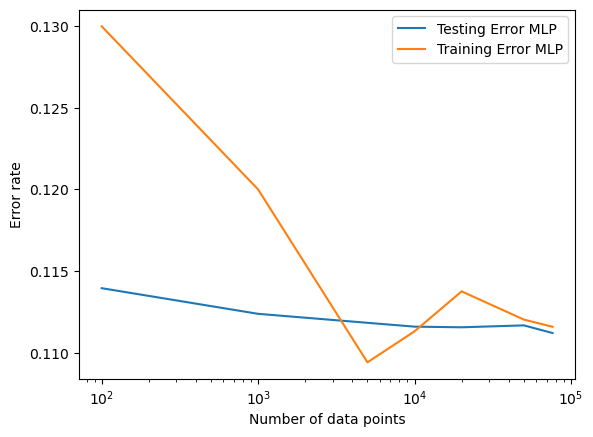

In [15]:
# perform Nueral Network with different training sizes

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


train_sizes = [100, 1000, 5000, 10000, 20000, 50000, 76324]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


training_errors_mlp = []
testing_errors_mlp = []
for m_tr in train_sizes:
 mlp = MLPClassifier(hidden_layer_sizes=(64), random_state=seed, solver='sgd', batch_size=256)
 mlp.fit(X_train[:m_tr], y_train[:m_tr])
 training_errors_mlp.append(1 - mlp.score(X_train[:m_tr], y_train[:m_tr]))
 testing_errors_mlp.append(1 - mlp.score(X_test, y_test))

plt.semilogx(train_sizes, testing_errors_mlp, label="Testing Error MLP")
plt.semilogx(train_sizes, training_errors_mlp, label="Training Error MLP")
plt.legend(loc='upper right')
plt.xlabel('Number of data points')
plt.ylabel('Error rate')
plt.show()



In [58]:
## Feature Design - Categorizing diag_1, diag_2, and diag_3

X_1 = X.drop(columns=['diag_1','diag_2','diag_3'])
Y_1= diabetic_data['readmitted']

diagnosis_columns = ['diag_1','diag_2','diag_3']

for col in diagnosis_columns:
    X_1[col] = pd.read_csv('data/dataset_diabetes/diabetic_data.csv', header=0, quotechar='"')[col]


X_1['diag_1']=X_1['diag_1'].apply(lambda x: 0 if x in ['?']  else x)
X_1['diag_2']=X_1['diag_2'].apply(lambda x: 0 if x in ['?']  else x)
X_1['diag_3']=X_1['diag_3'].apply(lambda x: 0 if x in ['?']  else x)

X_1['diag_1'] = X_1['diag_1'].replace('V','0.', regex=True)
X_1['diag_1'] = X_1['diag_1'].replace('E','0.', regex=True)

X_1['diag_2'] = X_1['diag_2'].replace('V','0.', regex=True)
X_1['diag_2'] = X_1['diag_2'].replace('E','0.', regex=True)

X_1['diag_3'] = X_1['diag_3'].replace('V','0.', regex=True)
X_1['diag_3'] = X_1['diag_3'].replace('E','0.', regex=True)

#X['diag_1'] = X['diag_1'].replace('?','0', regex=True)
X_1['diag_1'] = pd.to_numeric(X_1['diag_1'])
X_1['diag_2'] = pd.to_numeric(X_1['diag_2'])
X_1['diag_3'] = pd.to_numeric(X_1['diag_3'])


def func(x):
    if x == 0:
        return "unknown"
    elif 0 < x < 1:
        return "Others"
    elif 1 <= x < 140:
        return "Infectious and Parasitic Diseases"
    elif 140 <= x < 240:
        return "Neoplasms"
    elif 240 <= x < 280:
        return "Metabolic Diseases or Immunity Disorders"
    elif 280<= x < 290:
        return "Diseases Of The Blood And Blood-Forming Organs"
    elif 290 <= x < 320:
        return "Mental Disorders"
    elif 320 <= x < 390:
        return "Diseases Of The Nervous System And Sense Organs"
    elif 390 <= x < 460:
        return "Diseases Of The Circulatory System"
    elif 460 <= x < 520:
        return "Diseases Of The Respiratory System"
    elif 520 <= x < 580:
        return "Diseases Of The Digestive System"
    elif 580 <= x < 630:
        return "Diseases Of The Genitourinary System"
    elif 630 <= x < 680:
        return "Complications Of Pregnancy, Childbirth, And The Puerperium"
    elif 680 <= x < 710:
        return "Diseases Of The Skin And Subcutaneous Tissue"
    elif 710 <= x < 740:
        return "Diseases Of The Musculoskeletal System And Connective Tissue"
    elif 740 <= x < 780:
        return "Congenital Anomalies or Conditions Originating In The Perinatal Period"
    elif 780 <= x < 800:
        return "Symptoms,Signs"
    elif 800 <= x < 1000:
        return "Injury And Poisoning"
    else:
        return 'N/A'
    # Add elif statements....

X_1['diag_1'] = X_1['diag_1'].apply(func)
X_1['diag_2'] = X_1['diag_2'].apply(func)
X_1['diag_3'] = X_1['diag_3'].apply(func)


X_1['diag_1'] = le.fit_transform(X_1['diag_1'])
X_1['diag_2'] = le.fit_transform(X_1['diag_2'])
X_1['diag_3'] = le.fit_transform(X_1['diag_3'])

In [59]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, Y_1, test_size=0.25, random_state=seed)

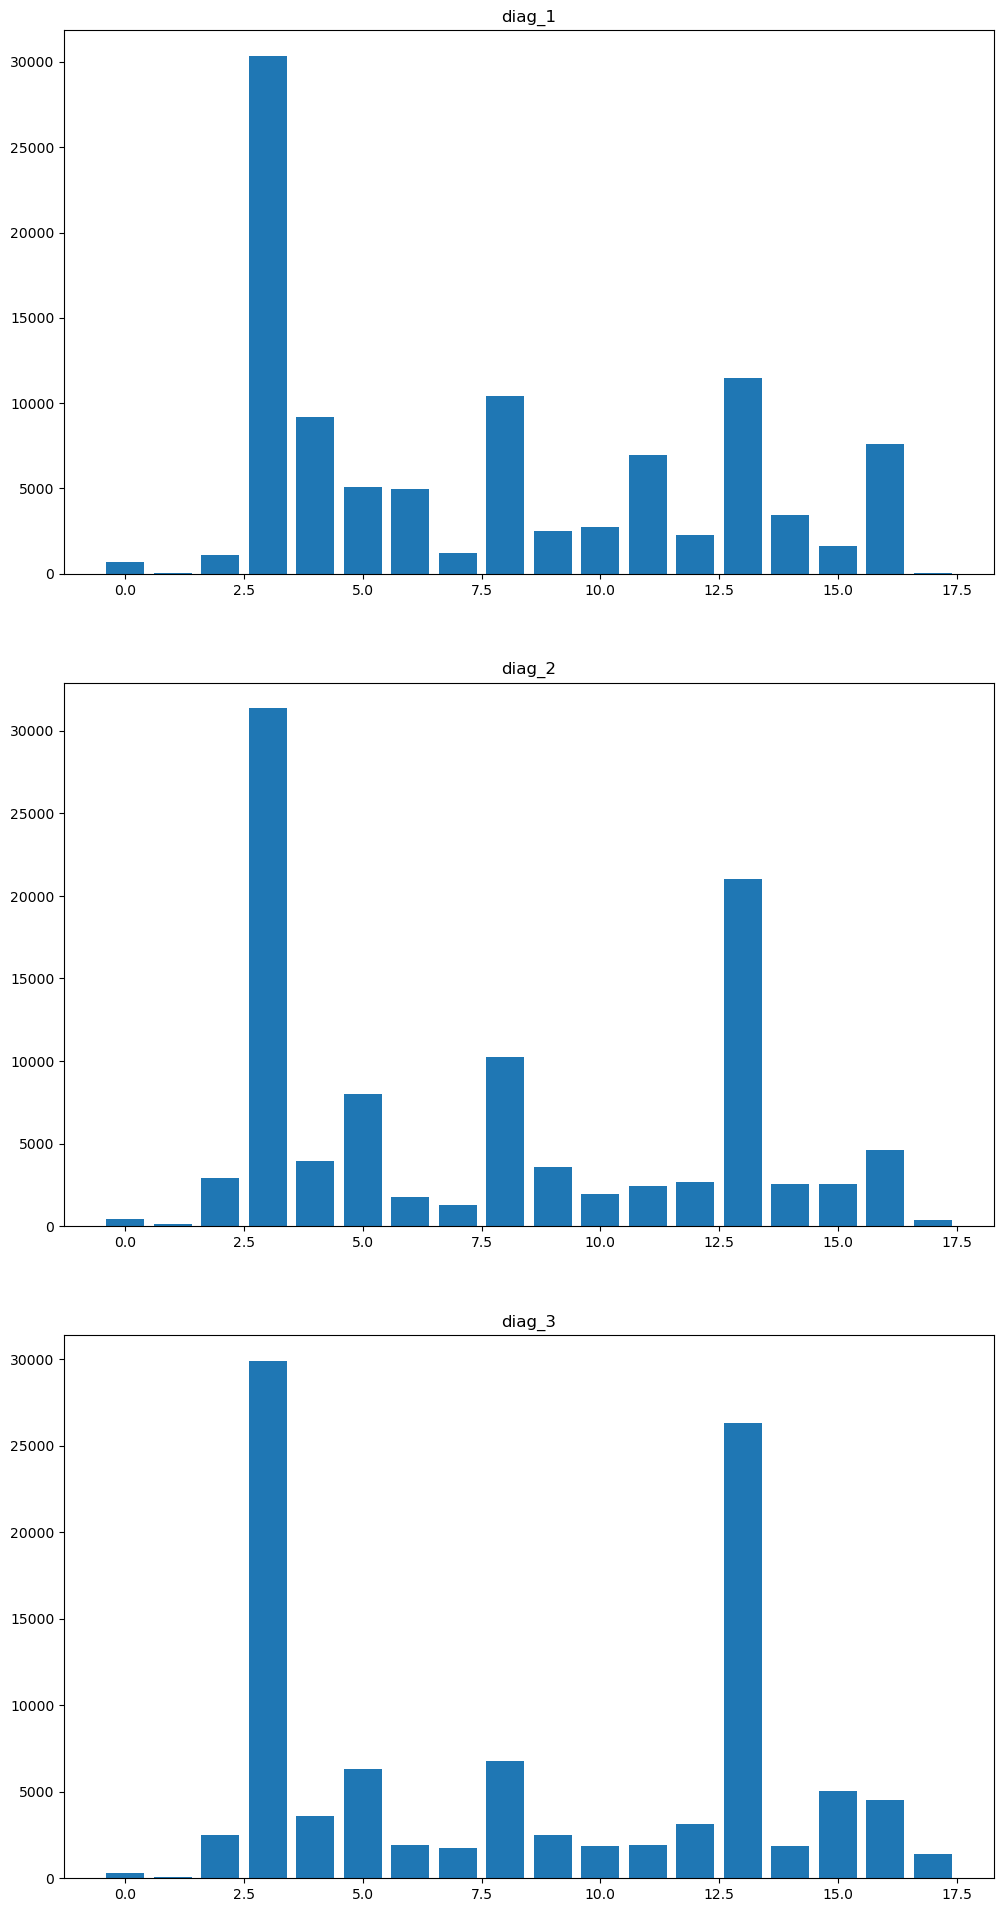

In [60]:
fig, ax = plt.subplots(3, 1, figsize=(12,24))
categories = ["diag_1", "diag_2", "diag_3"]
for i, j in enumerate (categories): 
    unique, counts = np.unique(X_1[j], return_counts=True)
    ax[i].bar (unique, counts)
    ax[i].set_title (j)

In [61]:
# Accuracy of diagnosis feature design

import pandas as pd
import zipfile
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
scaler = StandardScaler()
X_1_train = scaler.fit_transform(X_1_train)
X_1_test = scaler.transform(X_1_test)

model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', alpha=0.001, max_iter=20, validation_fraction=0.1, random_state=seed)

model.fit(X_1_train, y_1_train)

y_pred = model.predict(X_1_test)

# evaluate the model performance
accuracy = accuracy_score(y_1_test, y_pred)
confusion = confusion_matrix(y_1_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8884128606241648


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [63]:
# Feature design with Age: split into 2 groups, age < 30 and age >= 30

diabetic_data = pd.read_csv('data/dataset_diabetes/diabetic_data.csv', header=0, quotechar='"')
diabetic_data = diabetic_data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le = LabelEncoder()

label_encoding_columns = ['race', 'gender', 'diag_1', 'diag_2', 'diag_3',
            'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
            'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
            'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
            'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
            'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

for col in label_encoding_columns:
    diabetic_data[col] = le.fit_transform(diabetic_data[col])

diabetic_data['readmitted'] = diabetic_data['readmitted'].apply(lambda x: 0 if x in ['NO', '>30'] else 1)

diabetic_data['age'] = diabetic_data['age'].apply(lambda x: 0 if int(x.split('-')[0].strip('[')) < 30 else 1)

# Create 20% testing and 80% training data set split
X = diabetic_data.drop(columns=['readmitted'])
Y = diabetic_data['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

# Neural Network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', alpha=0.001, max_iter=20, validation_fraction=0.1, random_state=seed)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8886486911406336


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
# Feature design with Age: remove records with age < 30

diabetic_data = pd.read_csv('data/dataset_diabetes/diabetic_data.csv', header=0, quotechar='"')
diabetic_data = diabetic_data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le = LabelEncoder()

label_encoding_columns = ['race', 'gender', 'diag_1', 'diag_2', 'diag_3',
            'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
            'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
            'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
            'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
            'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

for col in label_encoding_columns:
    diabetic_data[col] = le.fit_transform(diabetic_data[col])

diabetic_data['readmitted'] = diabetic_data['readmitted'].apply(lambda x: 0 if x in ['NO', '>30'] else 1)

df_new = diabetic_data[~diabetic_data['age'].apply(lambda x: int(x.split('-')[0].strip('[')) < 30)]
diabetic_data = df_new
oe = OrdinalEncoder(categories=[['[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']], dtype=int)
diabetic_data['age'] = oe.fit_transform(diabetic_data[['age']])

# Create 20% testing and 80% training data set split
X = diabetic_data.drop(columns=['readmitted'])
Y = diabetic_data['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

# Neural Network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', alpha=0.001, max_iter=20, validation_fraction=0.1, random_state=seed)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8908321579689704


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
# Prepare for Parameterization
diabetic_data = pd.read_csv('data/dataset_diabetes/diabetic_data.csv', header=0, quotechar='"')
diabetic_data = diabetic_data.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)
le = LabelEncoder()

label_encoding_columns = ['race', 'gender', 'diag_1', 'diag_2', 'diag_3',
            'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
            'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
            'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
            'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
            'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']

for col in label_encoding_columns:
    diabetic_data[col] = le.fit_transform(diabetic_data[col])

diabetic_data['readmitted'] = diabetic_data['readmitted'].apply(lambda x: 0 if x in ['NO', '>30'] else 1)

oe = OrdinalEncoder(categories=[['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']], dtype=int)
diabetic_data['age'] = oe.fit_transform(diabetic_data[['age']])

In [8]:
# Create 25% testing and 75% training data set split
X = diabetic_data.drop(columns=['readmitted'])
Y = diabetic_data['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

# Scale the data. 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Parameterizing

# Learning Rates
learning_rates = [0.0005, 0.001, 0.005, 0.01]
lr_training_accuracy_rates = [[],] * len(learning_rates)
lr_testing_accuracy_rates = [[],] * len(learning_rates)

for i in range (len(learning_rates)): 
    learner = MLPClassifier(hidden_layer_sizes=128, activation='relu', learning_rate='constant', 
                            learning_rate_init=learning_rates[i],
                            solver='adam', alpha=0.001, max_iter=20, 
                            validation_fraction=0.1, random_state=seed)
    learner.fit (X_train, y_train)
    lr_training_accuracy_rates[i] = accuracy_score (learner.predict (X_train), y_train)
    lr_testing_accuracy_rates[i] = accuracy_score (learner.predict (X_test), y_test) 

C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
# Hidden Layer Sizes 
hidden_layers = [32, 64, 128, 256, 512]
hl_training_accuracy_rates = [[],] * len(hidden_layers)
hl_testing_accuracy_rates = [[],] * len(hidden_layers)
for i in range (len(hidden_layers)): 
    learner = MLPClassifier(hidden_layer_sizes=hidden_layers[i], activation='relu', learning_rate='constant', 
                            learning_rate_init=0.0005,solver='adam', alpha=0.001, max_iter=20, 
                            validation_fraction=0.1, random_state=seed)
    learner.fit (X_train, y_train)
    hl_training_accuracy_rates[i] = accuracy_score (learner.predict (X_train), y_train)
    hl_testing_accuracy_rates[i] = accuracy_score (learner.predict (X_test), y_test)

C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

In [11]:
# Batch Sizes 
batch_sizes = [32, 64, 128, 256, 512]
bats_training_accuracy_rates = [[],] * len(batch_sizes)
bats_testing_accuracy_rates = [[],] * len(batch_sizes)
for i in range (len(batch_sizes)): 
    learner = MLPClassifier(hidden_layer_sizes=hidden_layers[i], activation='relu', learning_rate='constant', 
                            learning_rate_init=0.0005,solver='adam', alpha=0.001, max_iter=20, 
                            validation_fraction=0.1, random_state=seed, batch_size=batch_sizes[i])
    learner.fit (X_train, y_train)
    bats_training_accuracy_rates[i] = accuracy_score (learner.predict (X_train), y_train)
    bats_testing_accuracy_rates[i] = accuracy_score (learner.predict (X_test), y_test)

C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

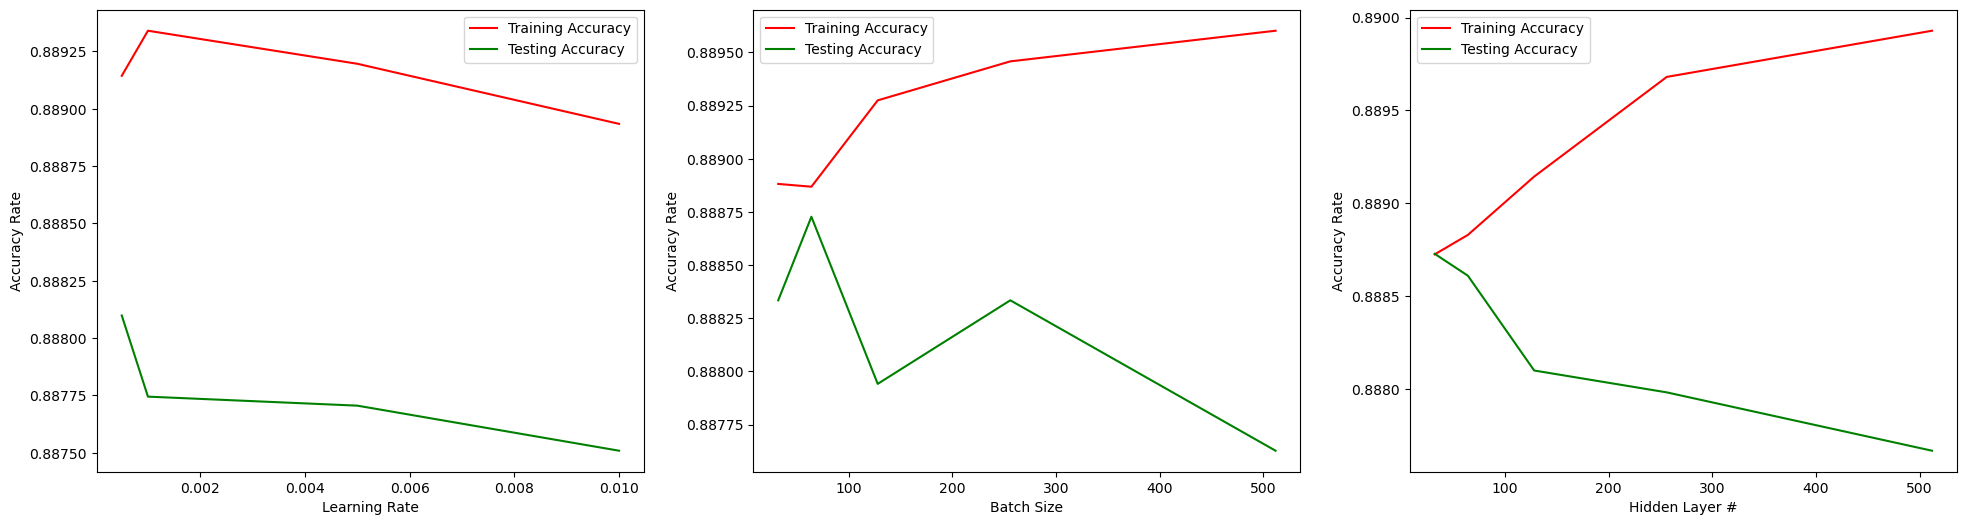

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(24,6))

ax[0].plot (learning_rates, lr_training_accuracy_rates, label="Training Accuracy", color='red')
ax[0].plot (learning_rates, lr_testing_accuracy_rates, label="Testing Accuracy", color='green')
ax[0].set_xlabel ("Learning Rate")
ax[0].set_ylabel ("Accuracy Rate")
ax[0].legend(fontsize=10, loc='upper right')

ax[2].plot (hidden_layers, hl_training_accuracy_rates, label="Training Accuracy", color='red')
ax[2].plot (hidden_layers, hl_testing_accuracy_rates, label="Testing Accuracy", color='green')
ax[2].set_xlabel ("Hidden Layer #")
ax[2].set_ylabel ("Accuracy Rate")
ax[2].legend(fontsize=10, loc='upper left')

ax[1].plot (batch_sizes, bats_training_accuracy_rates, label="Training Accuracy", color='red')
ax[1].plot (batch_sizes, bats_testing_accuracy_rates, label="Testing Accuracy", color='green')
ax[1].set_xlabel ("Batch Size")
ax[1].set_ylabel ("Accuracy Rate")
ax[1].legend(fontsize=10, loc='upper left')

In [13]:
# Using the parameters that resulted in the best accuracy rates. 
learner = MLPClassifier(hidden_layer_sizes=32, activation='relu', learning_rate='constant', 
                            learning_rate_init=0.0005,solver='adam', alpha=0.001, max_iter=20, 
                            validation_fraction=0.1, random_state=seed, batch_size=64)
learner.fit (X_train, y_train)
print (f"Accuracy = {accuracy_score (learner.predict (X_test), y_test)}")

Accuracy = 0.8884914707963211


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# Accuracy without cross Validatoin

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', alpha=0.001, max_iter=20, validation_fraction=0.1, random_state=seed)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8885307758823991


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
#Call X and Y again, standard Scaler should be applied within cross-validation

X = diabetic_data.drop(columns=['readmitted'])
Y = diabetic_data['readmitted']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [17]:
# Calculate cross-validation of our model

degrees = [2,4,8,10,12]
from sklearn.model_selection import KFold 
xval = KFold(n_splits = 5,random_state=seed,shuffle=True)
test = []*len(degrees)
test2 = []*len(degrees)
test3 = []*len(degrees)

J01_Cross_train_test = [0]*len(degrees)
J01_Cross_train_tr = [0]*len(degrees)
J01_Cross_evaluation = [0]*len(degrees)

y_t_Cross_predicts = [ [] ]*len(degrees)
y_v_Cross_predicts = [ [] ]*len(degrees)
y_e_Cross_predicts = [ [] ]*len(degrees)

J01_xval = [ 0. ]*len(degrees)
J01_xval2 = [ 0. ]*len(degrees)
J01_xval3 = [ 0. ]*len(degrees)

#test3 = [ 0. ]*len(degrees)

for iFold, (train_index, val_index) in enumerate(xval.split(X_train)):
        # Extract the ith cross-validation fold (training/validation split)
        Xti,Xvi,Yti,Yvi = X_train.iloc[train_index],X_train.iloc[val_index],y_train.iloc[train_index],y_train.iloc[val_index]
        
        scaler = StandardScaler()
        Xti = scaler.fit_transform(Xti)
        Xvi = scaler.transform(Xvi)
        Xei = scaler.transform(X_test)
        
    
        for j, degree in enumerate(degrees):
            
            model = MLPClassifier(hidden_layer_sizes=(16,degree), activation='relu',solver='adam', alpha=0.001, max_iter=100, validation_fraction=0.1, random_state=seed)

            CrossNN = model.fit(Xti,Yti)
            
            y_t_Cross_predicts[j] = CrossNN.predict(
                Xti) 
            y_v_Cross_predicts[j] = CrossNN.predict(
                Xvi) 
            y_e_Cross_predicts[j] = CrossNN.predict(
                Xei) 
            
        # Compute the accuracy score on the evaluation fold, Xvi/Yvi
            
            J01_Cross_train_test[j]= accuracy_score(
                CrossNN.predict(Xvi), Yvi)
            J01_Cross_train_tr[j]= accuracy_score(
                CrossNN.predict(Xti), Yti)
            J01_Cross_evaluation[j]= accuracy_score(
                CrossNN.predict(Xei), y_test)
            print("1")
        
       
        
        test.extend(J01_Cross_train_test)
        test2.extend(J01_Cross_train_tr)
        test3.extend(J01_Cross_evaluation)

# Evaluate by averaging the across the five folds
                    
test = np.asarray(test)       
test = test.reshape((5, 5))
test2 = np.asarray(test2)       
test2 = test2.reshape((5, 5))
test3 = np.asarray(test3)       
test3 = test3.reshape((5, 5))


for i in range(0,5):
    J01_xval[i] = np.mean(test[:,i])
    J01_xval2[i] = np.mean(test2[:,i])
    J01_xval3[i] = np.mean(test3[:,i])

1


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


1


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


1
1
1
1
1


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


1
1


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


1
1
1
1
1


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


1
1
1
1
1


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


1
1
1
1


C:\Users\nikit\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


1
1


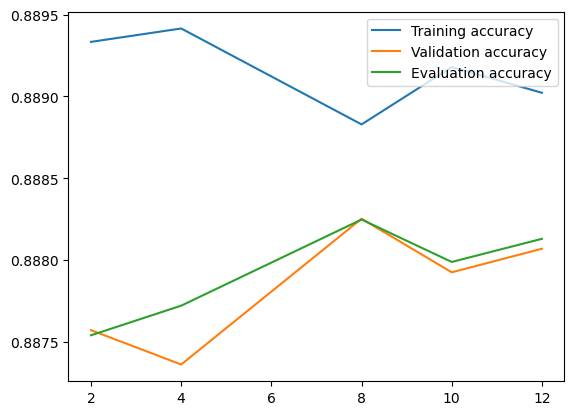

In [18]:
# Plot our accuracy
plt.plot(degrees,J01_xval2,label = "training")
plt.plot(degrees,J01_xval,label = "validation")
plt.plot(degrees,J01_xval3,label = "evaluating")



plt.legend(['Training accuracy','Validation accuracy',
            'Evaluation accuracy'],loc='upper right')